In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

In [3]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ml_exercise"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "../datasets/images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
pd.read_csv('../datasets/sensor_data/\sensorsID_12999_2022-06-01T00:00:00Z_2022-06-03T00:00:00Z.csv')

,time_stamp,sensor_index,humidity_a,humidity_b,temperature_a,temperature_b,pressure_a,pressure_b,pm2.5_atm_a,pm2.5_atm_b,pm2.5_cf_1_a,pm2.5_cf_1_b
0,2022-06-02T18:00:00Z,12999,45.689,NaN,90.494,NaN,983.569,NaN,8.969,8.707,8.969,8.707
1,2022-06-02T00:00:00Z,12999,58.133,NaN,85.200,NaN,984.770,NaN,13.053,12.705,13.053,12.705
2,2022-06-02T06:00:00Z,12999,63.772,NaN,79.472,NaN,984.470,NaN,8.587,8.402,8.587,8.402
3,2022-06-02T12:00:00Z,12999,53.992,NaN,86.519,NaN,985.053,NaN,6.981,6.756,6.981,6.756
4,2022-06-01T18:00:00Z,12999,41.467,NaN,96.900,NaN,985.721,NaN,11.386,11.357,11.386,11.357
5,2022-06-01T12:00:00Z,12999,41.539,NaN,97.244,NaN,989.225,NaN,18.115,17.613,18.116,17.613
6,2022-06-01T06:00:00Z,12999,63.844,NaN,77.756,NaN,988.692,NaN,15.815,15.131,15.815,15.131
7,2022-06-01T00:00:00Z,12999,55.617,NaN,84.167,NaN,988.602,NaN,12.823,12.515,12.823,12.515


In [5]:
# Path to the folder containing CSV files
folder_path = '../datasets/sensor_data/*.csv'

# Use glob to get all CSV files in the folder
csv_files = glob.glob(folder_path)

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate over each CSV file and read it into a DataFrame
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
sensor_nashville = pd.concat(dfs, ignore_index=True)

sensor_nashville

In [6]:
sensor_nashville.columns

Index(['time_stamp', 'sensor_index', 'humidity_a', 'humidity_b',
       'temperature_a', 'temperature_b', 'pressure_a', 'pressure_b',
       'pm2.5_atm_a', 'pm2.5_atm_b', 'pm2.5_cf_1_a', 'pm2.5_cf_1_b'],
      dtype='object')

In [7]:
# sensor_nashville.to_csv('../datasets/sensor_nashville.csv')

Saving figure attribute_histogram_plots


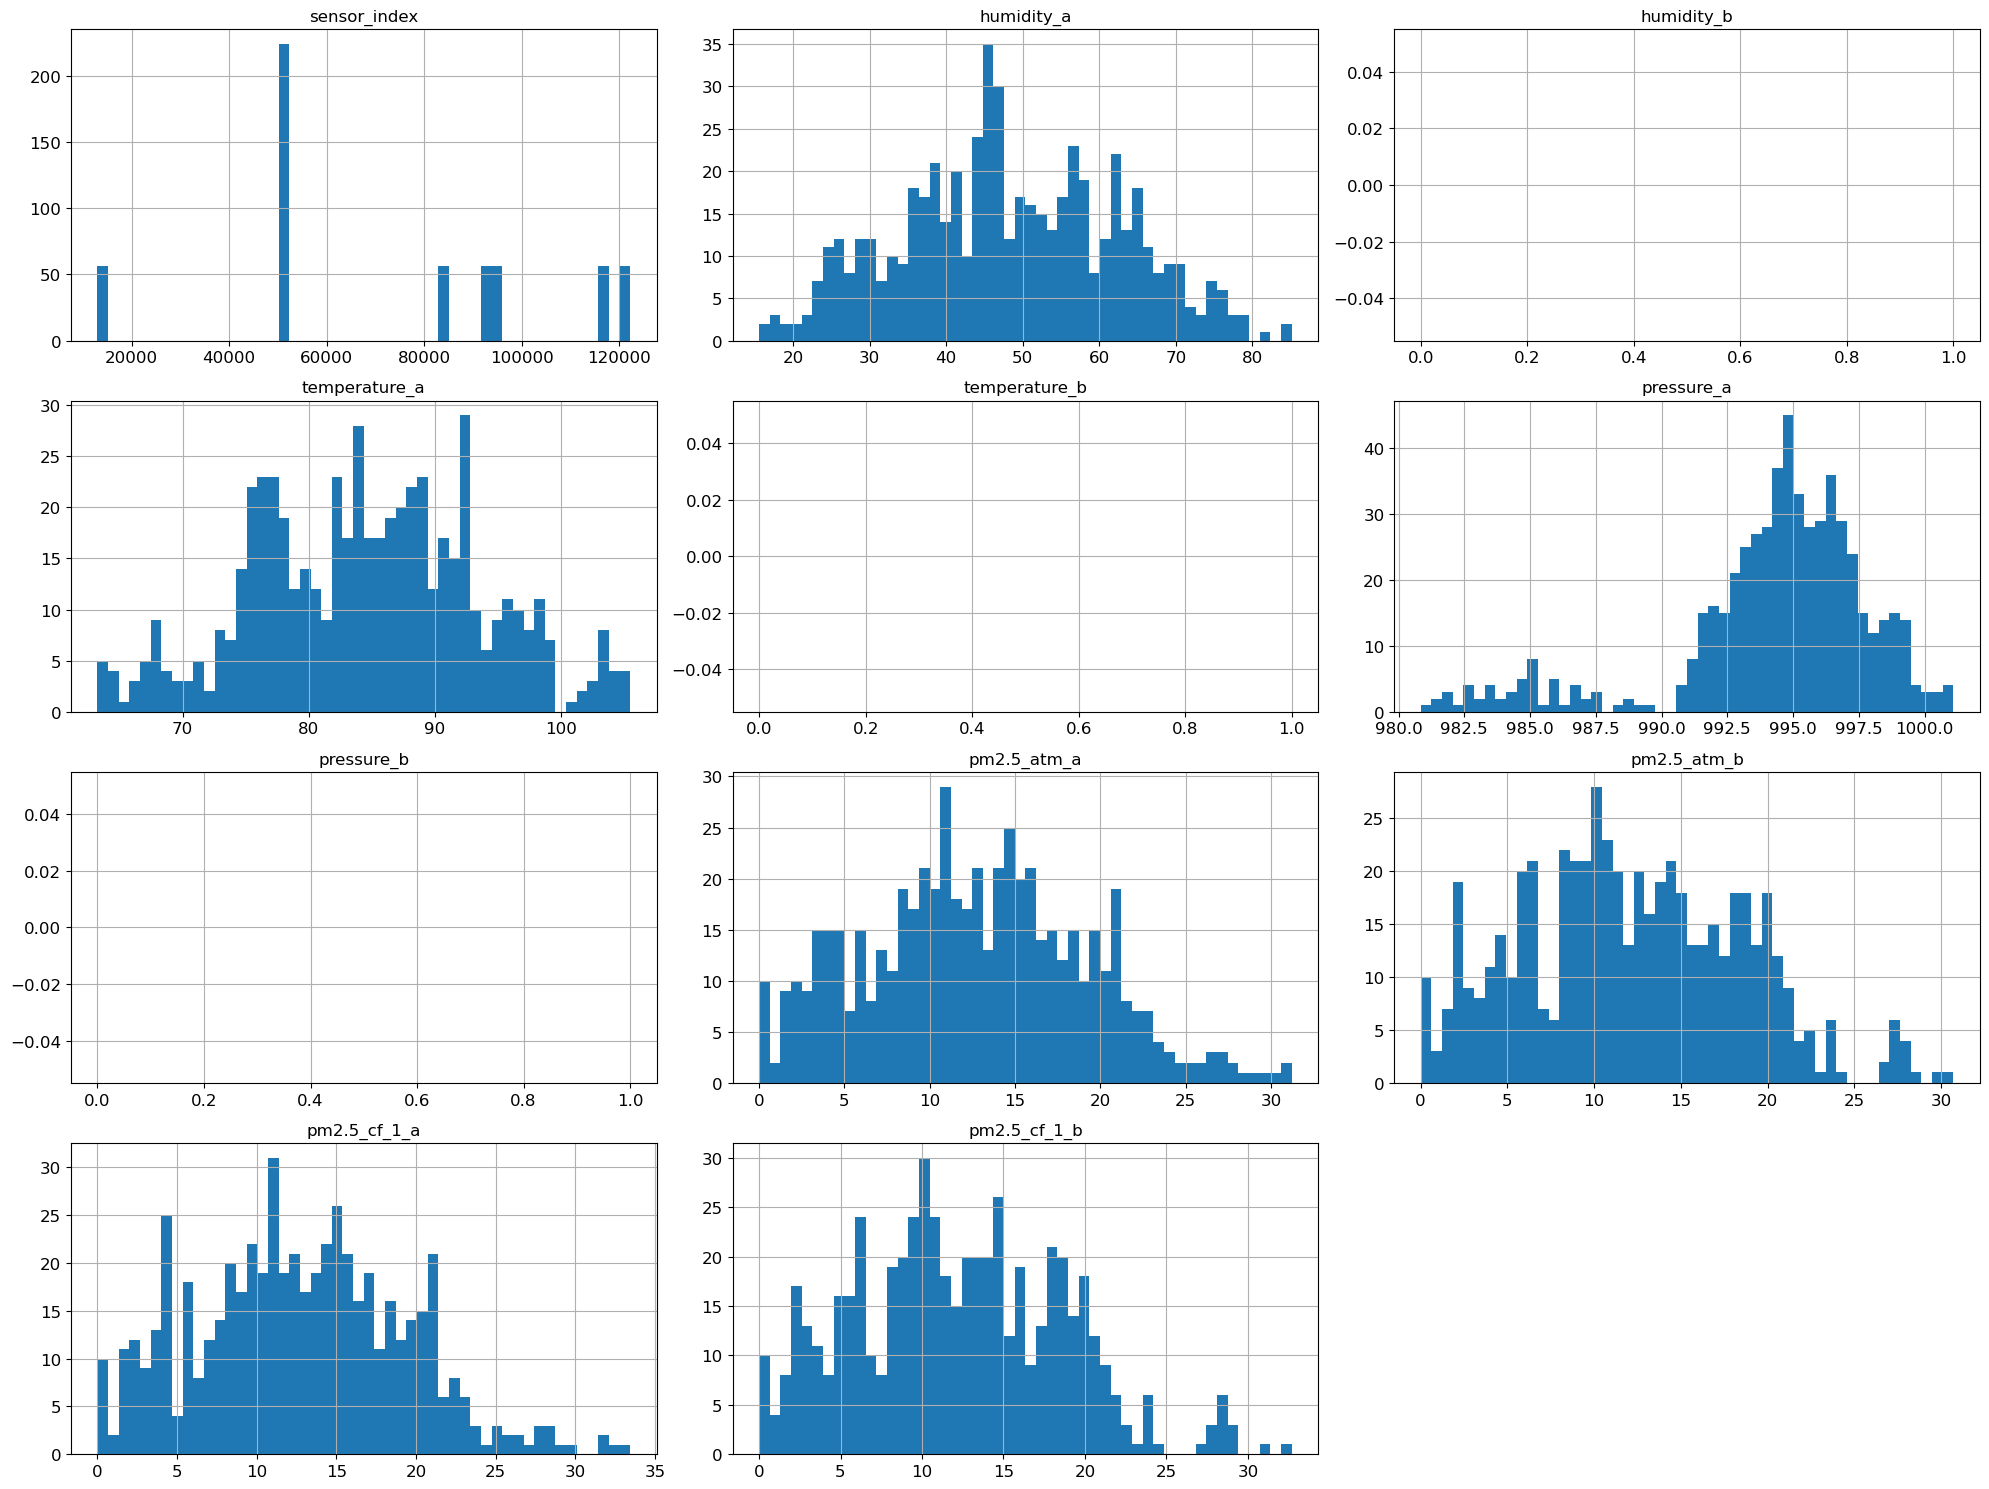

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
sensor_nashville.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

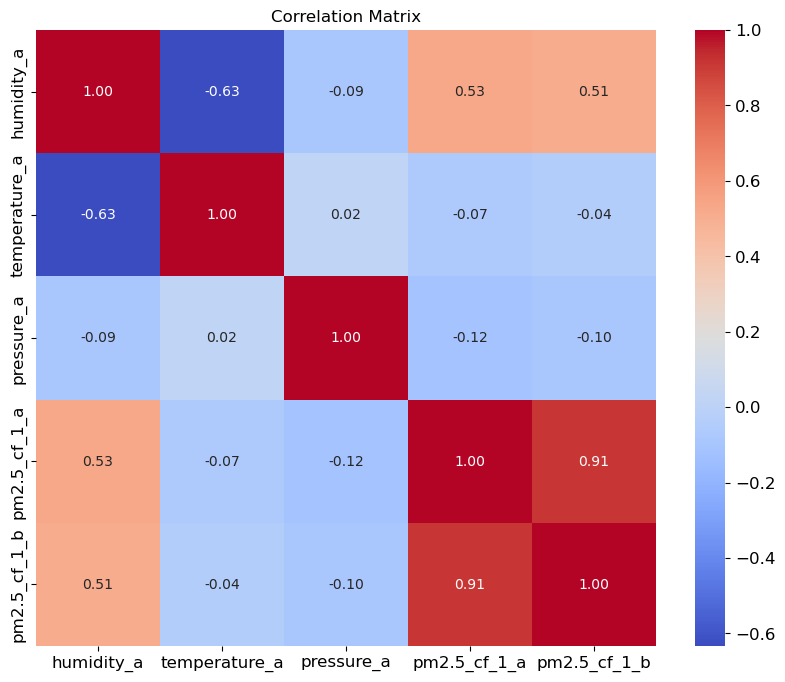

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
sensor_nashville_dropped_na=sensor_nashville.dropna(axis=1)
sensor_nashville_selected = sensor_nashville_dropped_na.drop(columns=['time_stamp','sensor_index','pm2.5_atm_a', 'pm2.5_atm_b'])

# Calculate the correlation matrix
correlation_matrix = sensor_nashville_selected.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()